<a href="https://colab.research.google.com/github/zwiebelb/Computational-Chemistry/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UV-VIS Data Plotter
This code reads in acetaminophen UV-Vis data from a csv file, and creates a plot of the spectra, and beers law using matplotlib.

Beer's law relates absorbance and the concentration of the absorbing substance, and is described by:

A = $ϵ *l*c$
Where:

$ϵ$ = absorpitivity

l = path length

c = concentration 

Absorbance is defined as:
$ A = -log(\frac{Intensity_{sample}}{Intensity_{blank}})$

Where Absorbance (A) is a unitless number

The $\lambda_{max}$ of the given acetaminophen data is 249.32 nm, and has a fit equation of:

Absorbance = 14521 * concentration

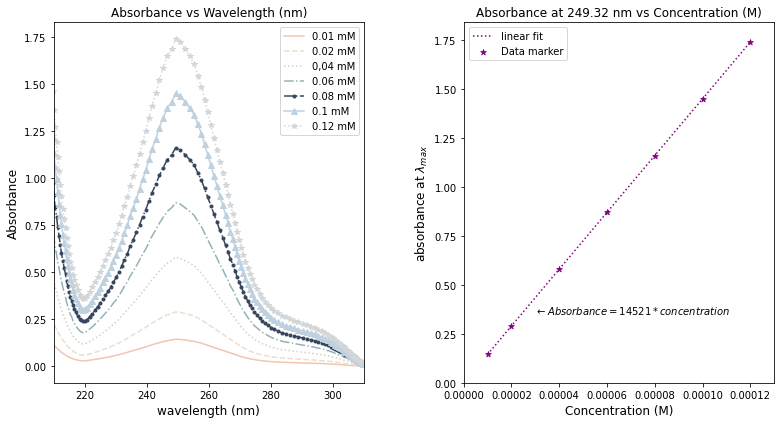

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def main():
  # defines the file path to read in
  path_uvis = "/content/drive/MyDrive/Class 2022F CompMethods/Data Files/acetaminophen_spectra.csv"
  path_beers_law = '/content/drive/MyDrive/Class 2022F CompMethods/Student Folders/Baila Zwiebel/Assignment 2 - UV-VIS plotter/Copy of acetaminophen_beerslaw.csv'

  # uses numpy from txt to read the csv file into a data array
  data_for_uvvis = np.genfromtxt(path_uvis, delimiter = ',', skip_header = 4)
  data_for_beers_law = np.genfromtxt(path_beers_law, delimiter =',', skip_header = 4)

  # lists that specify the label, color, and line style for each of the lines in the figure. 
  label_concentration = ['0.01 mM', '0.02 mM', '0,04 mM', '0.06 mM', '0.08 mM', '0.1 mM', '0.12 mM']
  color_style = ['#F1C5AE', '#ECDDD0', '#CED2C2',  '#92B1B6', '#35455D', '#BFD1DF', '#D2D6D9']
  line_style = ["-", "--", ":", "-.", ".-.", "-^", ":*"]

  # creates an 11x6 figure
  plt.figure(figsize = [11,6])
  # creates a subplot, with 2 graphs horizonatal
  plt.subplot(1,2,1)
  plt.title('Absorbance vs Wavelength (nm)')
  # loop that extracts the concentration and absorbance data and plots it with a specific line style, label, and color for each set of data. 
  for i in range(len(data_for_uvvis[0,:])-1):
    plt.plot(data_for_uvvis[:,0], data_for_uvvis[:,i+1], line_style[i], label = label_concentration[i], color = color_style[i])
  # sets the x limit of the graph
  plt.xlim([210,310])
  # adds x and y labels to the graph
  plt.xlabel('wavelength (nm)', fontsize = 12)
  plt.ylabel('Absorbance', fontsize = 12)
  # shows the legend
  plt.legend()

  # creates the second horizontal subplot
  plt.subplot(1,2,2)
  plt.title('Absorbance at 249.32 nm vs Concentration (M)')
  # plots a linear fit of the absorbance and concentration (in M) using the equation: Absorbance = 14521 * concentration
  plt.plot((data_for_beers_law[:,0]/1000), (14521 * data_for_beers_law[:,0]/1000), label = "linear fit", linestyle = ':', color = 'purple')

  # plots the individual data markers
  plt.scatter(data_for_beers_law[:,0]/1000, data_for_beers_law[:,1], marker = "*", LineWidths = 0.75, label = "Data marker", color = 'purple')
  # sets the x and y limits of the graph to start at 0,0 and end above their maximum value
  plt.xlim([0,(data_for_beers_law[:,0]/1000).max()+0.00001])
  plt.ylim([0,data_for_beers_law[:,1].max()+0.1])
  # adds x and y labels to the graph, and increases the font size to 12
  plt.xlabel('Concentration (M)', fontsize = 12)
  plt.ylabel(('absorbance at $\lambda_{max} $'), fontsize = 12)
  # displays the fit equation on the graph
  plt.text(0.00003, 0.35, '$\leftarrow Absorbance = 14521 * concentration$')
  # adds additional space between the two subplots
  plt.tight_layout(w_pad=5)
  plt.legend()

  plt.show()

if __name__ == "__main__":
  main()